<a href="https://colab.research.google.com/github/joshtrivedi/Machine-Learning/blob/main/FINAL_ESE/Question-2/Income_Expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse the income earned vs income spent for the customers
The dataset given has only two features, and the problem statement asks us to analyse the data given, which means there is no need to perform regression, and more emphasis needs to be given to the data visualisation part, however in a comparative way and then write the conclusion below.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Path to the dataset

In [2]:
dataset_path = "Question2.csv"

## Data filtering and visualisation using the seaborn and the sklearn libraries 

In [3]:
dataset = pd.read_csv(dataset_path)

In [4]:
dataset

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of earners')

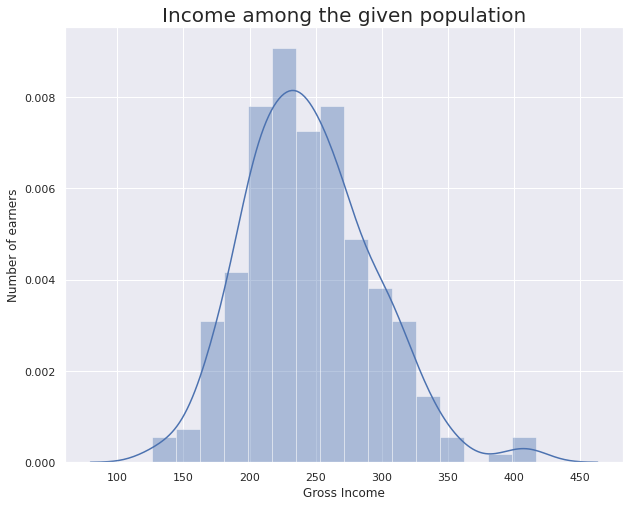

In [7]:
#plotting a histogram
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 8)
sns.set(style = 'darkgrid')
sns.distplot(dataset['INCOME'])
plt.title('Income among the given population', fontsize = 20)
plt.xlabel('Gross Income')
plt.ylabel('Number of earners')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


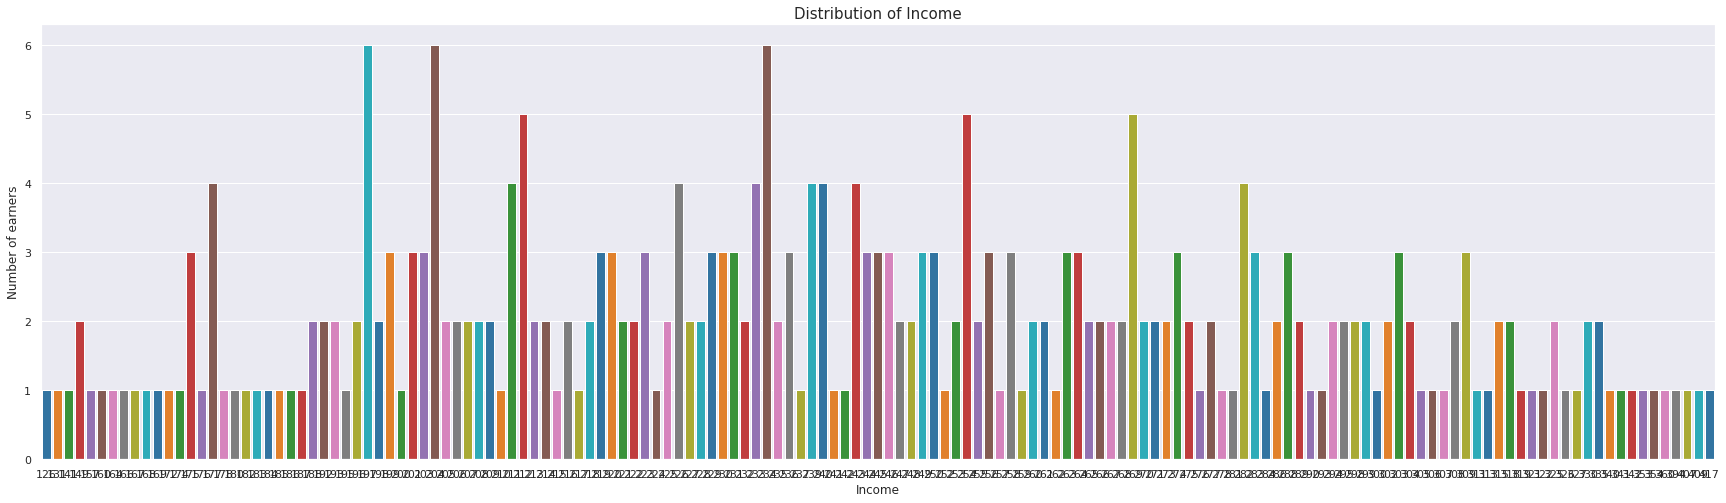

In [14]:
#plotting every user's income seperately
import seaborn as sns
plt.rcParams['figure.figsize'] = (30, 8)
sns.countplot(dataset['INCOME'], palette = 'tab10')
plt.title('Distribution of Income', fontsize = 15)
plt.xlabel('Income')
plt.ylabel('Number of earners')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


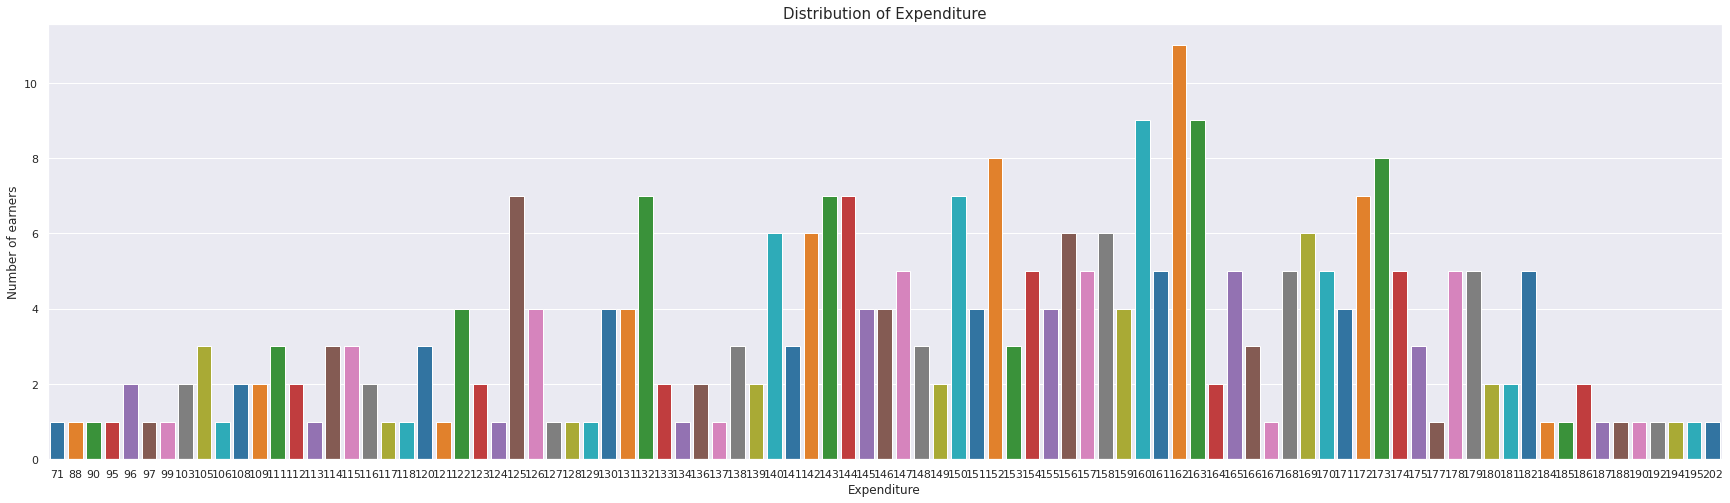

In [13]:
#Plotting every user's expenditure seperately
import seaborn as sns
plt.rcParams['figure.figsize'] = (30, 8)
sns.countplot(dataset['SPEND'], palette = 'tab10')
plt.title('Distribution of Expenditure', fontsize = 15)
plt.xlabel('Expenditure')
plt.ylabel('Number of earners')
plt.show()

## Plotting the elbow graph and KMeans Model

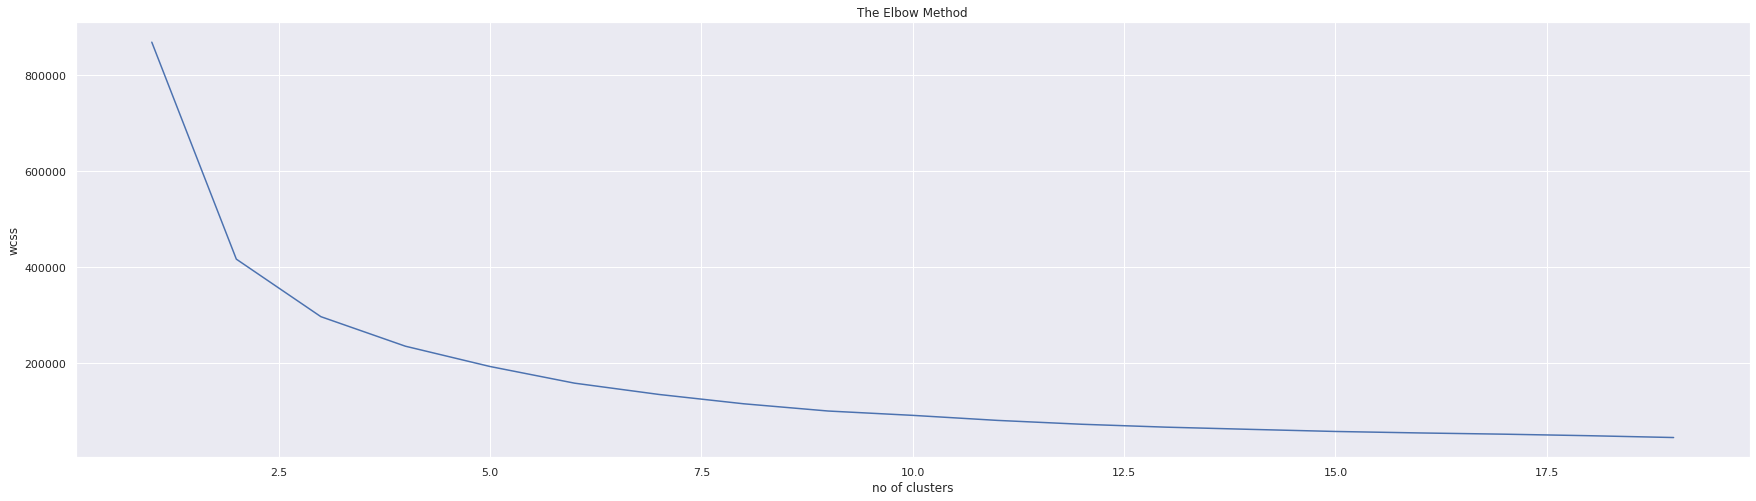

In [16]:
from sklearn.cluster import KMeans
#Elbow method
X= dataset.iloc[:, [0,1]].values
wcss=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

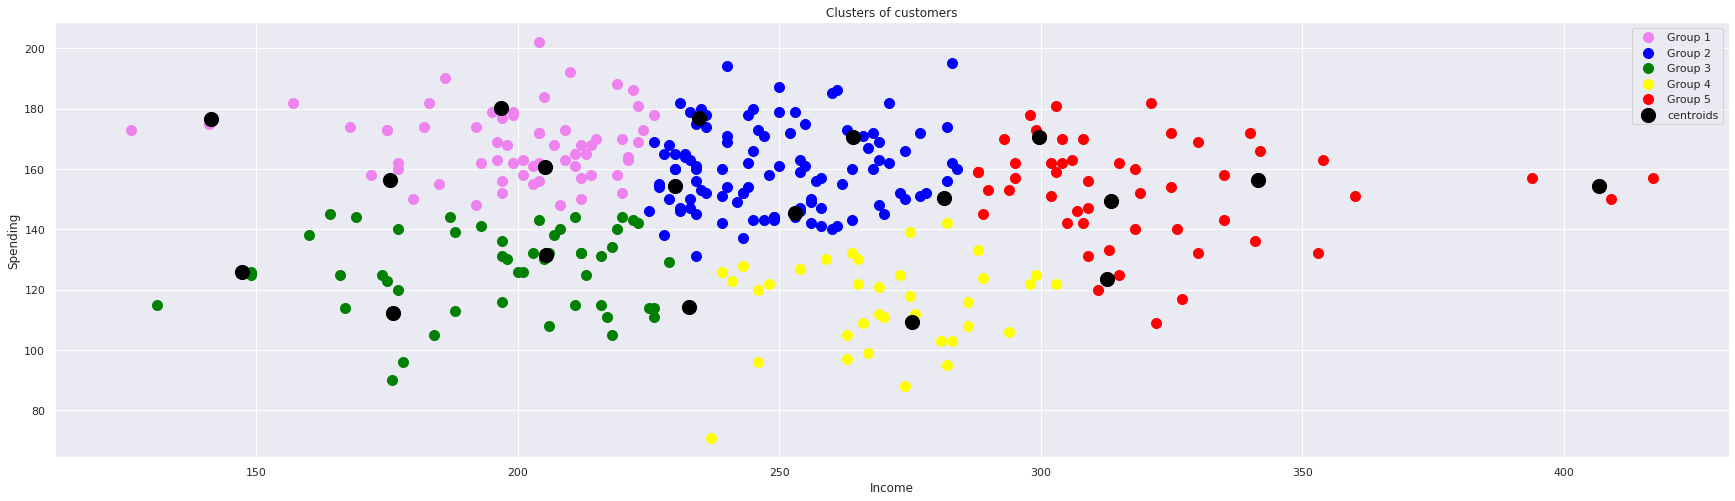

In [18]:
#Displaying the K means Model
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'violet', label = 'Group 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Group 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Group 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Group 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Group 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend()
plt.show()

## Comparsion between the Income v/s the Spending Scores

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


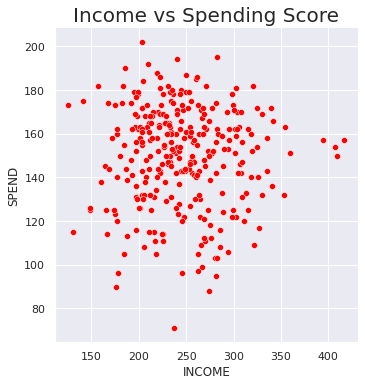

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


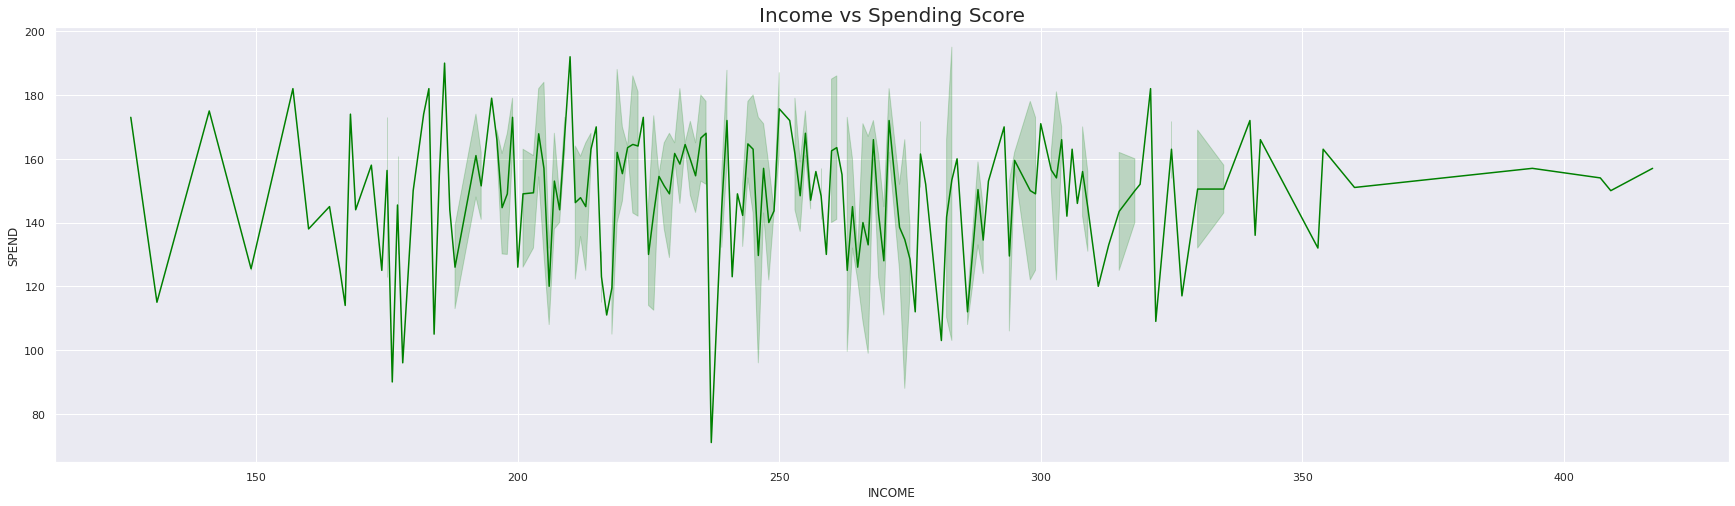

In [20]:
import seaborn as sns
x = dataset['INCOME']
y = dataset['SPEND']

sns.relplot(x, y, color = 'red')
plt.title('Income vs Spending Score', fontsize = 20)
plt.show()
sns.lineplot(x, y, color = 'green')
plt.title('Income vs Spending Score', fontsize = 20)
plt.show()

## Conclusion :
1. Looking at the plots above in the first section, it is clear that it might be a list of incomes and expenditure of a metro city, as there is not much deviation when it comes to expenditure, but earnings are ranging from min to max.
2. Looking at the K Means model, we can make groups of people with different incomes into clusters and realise that the pink and green groups are the low income households, as the centroids go far left too, AND red group is the lavish lifestyle mantaining high earning households which leave the middle class blue and the upper middle class yellow.
3. Looking at the Comparative view we can observe that the expenditure of almost all the people belonging into the 160-200 is the same, and there is some upper middle class that spends more than the average.   